<a href="https://www.kaggle.com/code/mohammadelsayedfahmy/predicting-uber-trip-price?scriptVersionId=102622431" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1  align ='center'> Predicting Price of uber trip </h1>

<h3 align = 'center'> Version 14  </h3>

## Introduction
- This is a project for predicting Uber trip price. As usual, the dataset we have is noisy and needs lots of feature engineering, and preprocessing.
- Now let's start working on a dataset in the Notebook. The first step is to import the libraries and load data. After that we will take a basic understanding of data like its shape, sample, is there are any NULL values present in the dataset. Understanding the data is an important step for prediction or any machine learning project.

## Project Agenda
- 1- Introduction
- 2- Load the Data
- 3- Data Assessing
- 4- Data Cleaning
- 5- Perfrom Exploratory Data Analysis
- 6- Feature Engineering
- 7- Model Selection 
- 8- Tesing The Selected Model


## 2- Loading the Data

In [1]:
#port Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
import plotly.express as px
from sklearn import ensemble
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
uber_df = pd.read_csv(r"../input/historicaluberdata/UberDataSet.csv")

## 3- Data Assessing 
__________________________________________________
- Data assessing is the step in which we evaluate our data.
### In this step:
- We take a quick look inside our data and the columns.
- Check if there are any missing values in the data so that we can handle them.
- Check if there are duplicated values.


In [2]:
uber_df.head(5)

,Unnamed: 0,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,12,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,12.0,1.11,1.0,42.3647,-71.0542,40.13,38.08,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.60,3.38,3.99,1543554000,9.833,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,cloudy,27.31,1017.16,281,1.00,0,9.833,281.8,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,13,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,16.0,1.11,1.0,42.3647,-71.0542,20.38,20.38,Clear,Partly cloudy throughout the day.,0.0000,0.00,0.66,2.94,3.22,1544738400,9.831,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,clear-night,10.87,1031.51,2,0.03,0,9.831,327.3,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
2,14,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,7.5,1.11,1.0,42.3647,-71.0542,32.85,32.85,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.56,2.65,3.83,1544738400,9.959,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,18.66,1033.65,76,0.64,0,9.959,330.8,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
3,15,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,7.5,1.11,1.0,42.3647,-71.0542,41.29,36.01,Light Rain,Rain throughout the day.,0.0567,0.94,0.86,8.30,8.30,1545015600,4.054,43.83,1544990400,34.25,1545044400,38.38,1544986800,28.30,1545044400,rain,37.56,1012.72,57,1.00,0,4.054,325.3,1544962119,1544994839,0.30,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
4,16,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.0,1.11,1.0,42.3647,-71.0542,31.25,31.25,Overcast,Partly cloudy throughout the day.,0.0000,0.00,0.64,2.62,3.54,1544738400,10.000,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,cloudy,20.53,1035.06,173,0.91,0,10.000,326.7,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [3]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385663 entries, 0 to 385662
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   385663 non-null  int64  
 1   id                           385663 non-null  object 
 2   timestamp                    385663 non-null  float64
 3   hour                         385663 non-null  int64  
 4   day                          385663 non-null  int64  
 5   month                        385663 non-null  int64  
 6   datetime                     385663 non-null  object 
 7   timezone                     385663 non-null  object 
 8   source                       385663 non-null  object 
 9   destination                  385663 non-null  object 
 10  cab_type                     385663 non-null  object 
 11  product_id                   385663 non-null  object 
 12  name                         385663 non-null  object 
 13 

In [4]:
uber_df.isnull().sum()

Unnamed: 0                         0
id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
w

In [5]:
uber_df.columns

Index(['Unnamed: 0', 'id', 'timestamp', 'hour', 'day', 'month', 'datetime',
       'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name',
       'price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'ap

In [6]:
uber_df['cab_type'].value_counts()

Uber    385663
Name: cab_type, dtype: int64

In [7]:
uber_df.product_id.value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
Name: product_id, dtype: int64

In [8]:
uber_df['name'].value_counts()

UberXL       55096
WAV          55096
Black SUV    55096
Black        55095
Taxi         55095
UberX        55094
UberPool     55091
Name: name, dtype: int64

In [9]:
uber_df.shape

(385663, 58)

In [10]:
uber_df.duplicated().sum()

0

### 4- Data Cleaning
- We must drop   ('Unnamed: 0','DateTime','id','product_id','long_summary','short_summary','timestamp' ) Columns  because we don't need them
- Fix Missing Values in price column by Droping missing values in price column
- Change icon and name Columns name to Weather and Uber Service Type


In [11]:
uber_df.dropna(inplace=True)
#since we have one timezone so i will delete it  which America/New_York and also for cab_type since we have only uber 
uber_df.timezone.value_counts()

America/New_York    330568
Name: timezone, dtype: int64

In [12]:
# Removeing  'latitude', 'longitude','source', 'destination','datetime','Unnamed: 0','index','id','product_id','long_summary','short_summary','timestamp','timezone','cab_type' Columns 
uber_df=uber_df.reset_index()
uber_df = uber_df.drop(['latitude', 'longitude','source', 'destination','datetime','Unnamed: 0','index','id','product_id','long_summary','short_summary','timestamp','timezone','cab_type'], axis=1 )
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330568 entries, 0 to 330567
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         330568 non-null  int64  
 1   day                          330568 non-null  int64  
 2   month                        330568 non-null  int64  
 3   name                         330568 non-null  object 
 4   price                        330568 non-null  float64
 5   distance                     330568 non-null  float64
 6   surge_multiplier             330568 non-null  float64
 7   temperature                  330568 non-null  float64
 8   apparentTemperature          330568 non-null  float64
 9   precipIntensity              330568 non-null  float64
 10  precipProbability            330568 non-null  float64
 11  humidity                     330568 non-null  float64
 12  windSpeed                    330568 non-null  float64
 13 

In [13]:
uber_df.shape

(330568, 45)

In [14]:
# Change icon and name Columns name to Weather and Uber Service Type
uber_df.rename(columns={'name': 'service_type','icon':'weather_condition'}, inplace=True)
uber_df.head(2)

,hour,day,month,service_type,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,weather_condition,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,22,30,11,UberXL,12.0,1.11,1.0,40.13,38.08,0.0,0.0,0.60,3.38,3.99,1543554000,9.833,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,cloudy,27.31,1017.16,281,1.00,0,9.833,281.8,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
1,10,13,12,Black,16.0,1.11,1.0,20.38,20.38,0.0,0.0,0.66,2.94,3.22,1544738400,9.831,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,clear-night,10.87,1031.51,2,0.03,0,9.831,327.3,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800


In [15]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330568 entries, 0 to 330567
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         330568 non-null  int64  
 1   day                          330568 non-null  int64  
 2   month                        330568 non-null  int64  
 3   service_type                 330568 non-null  object 
 4   price                        330568 non-null  float64
 5   distance                     330568 non-null  float64
 6   surge_multiplier             330568 non-null  float64
 7   temperature                  330568 non-null  float64
 8   apparentTemperature          330568 non-null  float64
 9   precipIntensity              330568 non-null  float64
 10  precipProbability            330568 non-null  float64
 11  humidity                     330568 non-null  float64
 12  windSpeed                    330568 non-null  float64
 13 

In [16]:
uber_df.to_csv(r'CleanAndFilteredData.csv')


### 5 - Perform EDA(Exploratory Data Analysis)
- Exploratory analysis is a process to explore and understand the data and data relationship in a complete depth so that it makes feature engineering and machine learning modeling steps smooth and streamlined for prediction.



<AxesSubplot:xlabel='price', ylabel='Density'>

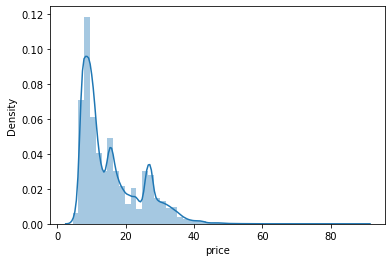

In [17]:
sns.distplot(uber_df['price'])

<AxesSubplot:xlabel='service_type', ylabel='price'>

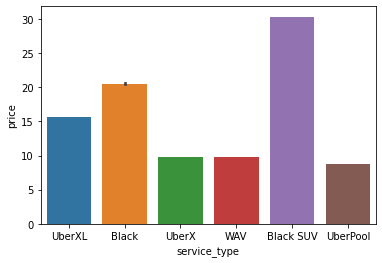

In [18]:
sns.barplot(x='service_type', y='price', data=uber_df)

<AxesSubplot:title={'center':'Number of trips per Month '}>

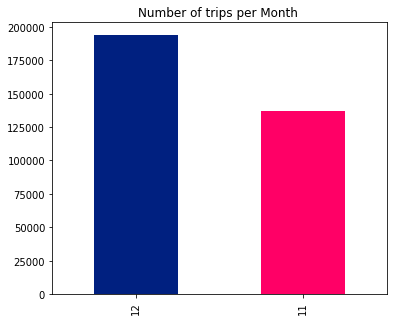

In [19]:
uber_df['month'].value_counts().plot(kind='bar', figsize=(6,5), color=['#002080','#ff0066'],title = "Number of trips per Month ")

#### Great We have data For two months that is November and December

In [20]:
pie_df = uber_df.weather_condition.value_counts().reset_index()
pie_df.columns = ['condition', 'count']
# pie_df.head()
fig = px.pie(pie_df, values='count', names='condition', title='The proportion of number of trips in each weather condition', color_discrete_sequence=['#003f5c','#ffa600','#bc5090'], hole=0.2)
fig.show()

## 6- Feature Engineering
-----------------------------------------------------

What is a feature and why we need the engineering of it? Basically, all machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly. Here, the need for feature engineering arises. 

I think feature engineering efforts mainly have two goals:

1) Preparing the proper input dataset, compatible with the machine learning algorithm requirements.

2) Improving the performance of machine learning models.

### 6.1-  Encoding Pandas Get dummy 

In [21]:
uber_df.head(1)

,hour,day,month,service_type,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,weather_condition,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,22,30,11,UberXL,12.0,1.11,1.0,40.13,38.08,0.0,0.0,0.6,3.38,3.99,1543554000,9.833,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,cloudy,27.31,1017.16,281,1.0,0,9.833,281.8,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600


In [22]:
uber_df.service_type.value_counts()

UberXL       55096
WAV          55096
Black SUV    55096
Black        55095
UberX        55094
UberPool     55091
Name: service_type, dtype: int64

In [23]:
uber_df.shape

(330568, 45)

In [24]:
uber_df = pd.get_dummies(uber_df,drop_first=False)

In [25]:
uber_df.head()

,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,service_type_Black,service_type_Black SUV,service_type_UberPool,service_type_UberX,service_type_UberXL,service_type_WAV,weather_condition_ clear-day,weather_condition_ clear-night,weather_condition_ cloudy,weather_condition_ fog,weather_condition_ partly-cloudy-day,weather_condition_ partly-cloudy-night,weather_condition_ rain
0,22,30,11,12.0,1.11,1.0,40.13,38.08,0.0000,0.00,0.60,3.38,3.99,1543554000,9.833,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,27.31,1017.16,281,1.00,0,9.833,281.8,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600,0,0,0,0,1,0,0,0,1,0,0,0,0
1,10,13,12,16.0,1.11,1.0,20.38,20.38,0.0000,0.00,0.66,2.94,3.22,1544738400,9.831,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,10.87,1031.51,2,0.03,0,9.831,327.3,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,1,0,0,0,0,0,0,1,0,0,0,0,0
2,19,13,12,7.5,1.11,1.0,32.85,32.85,0.0000,0.00,0.56,2.65,3.83,1544738400,9.959,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,18.66,1033.65,76,0.64,0,9.959,330.8,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,0,0,0,1,0,0,0,0,0,0,1,0,0
3,23,16,12,7.5,1.11,1.0,41.29,36.01,0.0567,0.94,0.86,8.30,8.30,1545015600,4.054,43.83,1544990400,34.25,1545044400,38.38,1544986800,28.30,1545044400,37.56,1012.72,57,1.00,0,4.054,325.3,1544962119,1544994839,0.30,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,14,12,26.0,1.11,1.0,31.25,31.25,0.0000,0.00,0.64,2.62,3.54,1544738400,10.000,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,20.53,1035.06,173,0.91,0,10.000,326.7,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,0,1,0,0,0,0,0,0,1,0,0,0,0


In [26]:
uber_df.shape

(330568, 56)

## 6.2- RFE (Recursive Feature Elimination) And R squared 
--------------------------------------
- Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.

- RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are  more or most relevant in predicting the target variable.

- RFE is divided into three parts; they are:

- Recursive Feature Elimination
- RFE With scikit-learn
    - RFE for Classification
    - RFE for Regression
- RFE Hyperparameters
   -  Explore Number of Features
    - Automatically Select the Number of Features
    - Which Features Were Selected
   -  Explore Base Algorithm
   
   
   
 - R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

### 6.2.1- Load the necessary libraries

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

### 6.2.2- Define Dependent Variable 'y', independent variable 'X'  and dictionary of R_sqaured 

In [28]:
# Define Dependent Variable 'y'and independent variable 'X'
X = uber_df.drop('price', axis= 1)
y = uber_df['price']
print(X.shape)
print(y.shape)
R_sqaured = {}
Mean_SE = {}

(330568, 55)
(330568,)


### RFE (Recursive Feature Elimination) Function

In [29]:
#ٍSplitting data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

def RFE_Function(i):
    reg = LinearRegression()
    rfe = RFE(reg , n_features_to_select = i)
    rfe = rfe.fit(X_train, y_train)
    selected_columns = X_train[X_train.columns[rfe.support_]]
    #Fitting training data
    reg = reg.fit(selected_columns, y_train)
    R_sqaured['Feature_'+str(i)]=reg.score(X_test[selected_columns.columns], y_test)
    y_pred = reg.predict(X_test[selected_columns.columns])
    Mean_SE['Feature_'+str(i)] = metrics.mean_squared_error(y_test,y_pred)
    return selected_columns 

#### Model 0 With All features 

In [30]:
X_55 = RFE_Function(55)
print("The R squared of 55 feature is ",R_sqaured['Feature_55'])
print("The MSE of 55 feature is ",Mean_SE['Feature_55'])
print(X_55.shape)

The R squared of 55 feature is  0.9195922983973197
The MSE of 55 feature is  5.899311155317533
(231397, 55)


#### Model 1: with 48 features 


In [31]:
X_48 = RFE_Function(48)
print("The R squared of 48 feature is ",R_sqaured['Feature_48'])
print("The MSE of 48 feature is ",Mean_SE['Feature_48'])
print(X_48.shape)

The R squared of 48 feature is  0.919591177048744
The MSE of 48 feature is  5.899393425846717
(231397, 48)


#### Model 2: with 28 features using RFE

In [32]:
X_28 = RFE_Function(28)
print("The R squared of 28 feature is ",R_sqaured['Feature_28'])
print("The MSE of 28 feature is ",Mean_SE['Feature_28'])
print(X_28.shape)

The R squared of 28 feature is  0.9196002878176859
The MSE of 28 feature is  5.898724991607449
(231397, 28)


#### Model 3: with 18 features using RFE

In [33]:
X_18= RFE_Function(18)
print("The R squared of 18 feature is ",R_sqaured['Feature_18'])
print("The MSE of 18 feature is ",Mean_SE['Feature_18'])
print(X_18.shape)

The R squared of 18 feature is  0.9195957293287025
The MSE of 18 feature is  5.899059436497367
(231397, 18)


#### Model 4: with 8 features using RFE

In [34]:
X_8= RFE_Function(8)
print("The R squared of 8 feature is ",R_sqaured['Feature_8'])
print("The MSE of 8 feature is ",Mean_SE['Feature_8'])
print(X_8.shape)

The R squared of 8 feature is  0.9195942357232211
The MSE of 8 feature is  5.899169018580962
(231397, 8)


#### Model 5: with 5 features using RFE

In [35]:
X_5= RFE_Function(5)
print("The R squared of 5 feature is ",R_sqaured['Feature_5'])
print("The MSE of 5 feature is ",Mean_SE['Feature_5'])
print(X_5.shape)

The R squared of 5 feature is  0.8060617738989537
The MSE of 5 feature is  14.228760651980375
(231397, 5)


In [36]:
R_sqaured

{'Feature_55': 0.9195922983973197,
 'Feature_48': 0.919591177048744,
 'Feature_28': 0.9196002878176859,
 'Feature_18': 0.9195957293287025,
 'Feature_8': 0.9195942357232211,
 'Feature_5': 0.8060617738989537}

In [37]:
Mean_SE

{'Feature_55': 5.899311155317533,
 'Feature_48': 5.899393425846717,
 'Feature_28': 5.898724991607449,
 'Feature_18': 5.899059436497367,
 'Feature_8': 5.899169018580962,
 'Feature_5': 14.228760651980375}

#### Chosing number of features 
* As the percentages are close to accuracy, which is 91 % , except when applying RFE with 5 Features  give us 80% , so I will choose training with 8 features. and MSE Also The same As the Value are close to 5.8 except when applying  RFE with 5 Features  give us 14.2

* It is clear from the differences that there is nothing influential other than the type of car and the distance so we will go with X_8

In [38]:
X_8.columns

Index(['distance', 'temperatureMax', 'service_type_Black',
       'service_type_Black SUV', 'service_type_UberPool', 'service_type_UberX',
       'service_type_UberXL', 'service_type_WAV'],
      dtype='object')

In [39]:
X_8.drop(['temperatureMax'],axis= 1,inplace=True)
X_8.columns

Index(['distance', 'service_type_Black', 'service_type_Black SUV',
       'service_type_UberPool', 'service_type_UberX', 'service_type_UberXL',
       'service_type_WAV'],
      dtype='object')

In [40]:
X_train = X_8
X_test = X_test[X_8.columns]
print(X_train.shape)
print(X_test.shape)

(231397, 7)
(99171, 7)


## 7- Model Selection

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### 7.1 Linear Regression Model 

In [42]:
linear = LinearRegression()
linear.fit(X_train, y_train)
print(linear.score(X_test, y_test))
y_pred = linear.predict(X_test)
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.9195958362802428
MSE :   5.899051589731422
RMAE :   2.4287963252877796


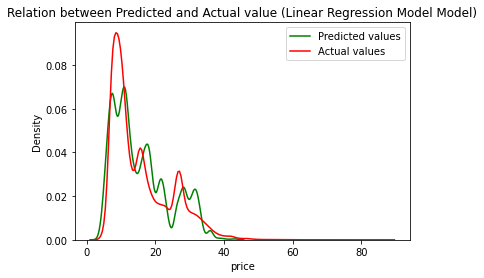

In [43]:
sns.kdeplot(y_pred, color="green", label='Predicted values') # Linear Regression Model prediction
sns.kdeplot(y_test, color="red", label='Actual values')
plt.title("Relation between Predicted and Actual value (Linear Regression Model Model)")
plt.legend()
plt.show()

#### 7.3 Random Forest Regressor

In [44]:
random = RandomForestRegressor(n_estimators = 100, random_state = 0) 
random.fit(X_train, y_train) 
print(random.score(X_test, y_test))
y_pred = random.predict(X_test)
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.950325665234606
MSE :   3.6444812048289927
RMAE :   1.9090524363749133


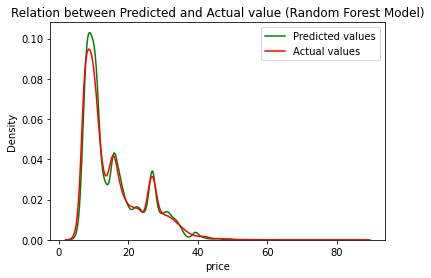

In [45]:
sns.kdeplot(y_pred, color="green", label='Predicted values') # Random Forest prediction
sns.kdeplot(y_test, color="red", label='Actual values')
plt.title("Relation between Predicted and Actual value (Random Forest Model)")
plt.legend()
plt.show()

#### Random Forest Gived us 95%  so we will go with it

## 8- Testing
* K fold Cross Validation
* Testing For Random Forest Regressor

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
mse = cross_val_score(LinearRegression(),X_test,y_test,cv=cv , scoring='neg_mean_squared_error')
print(mse)
print(' Mean of All Folds  is',mse.mean() )

[-5.72484658 -6.01129174 -5.83388614 -5.87206296 -5.90836864]
 Mean of All Folds  is -5.870091214694746


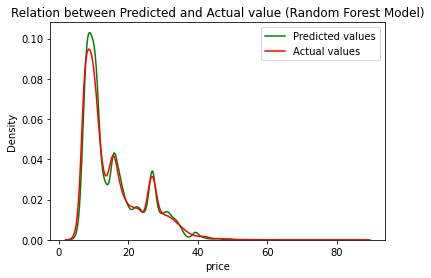

In [47]:
sns.kdeplot(y_pred, color="green", label='Predicted values') 
sns.kdeplot(y_test, color="red", label='Actual values')
plt.title("Relation between Predicted and Actual value (Random Forest Model)")
plt.legend()
plt.show()